In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [3]:
data = pd.read_csv("Mall_Customers.csv")

In [4]:
data.shape

(200, 5)

In [5]:
data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
data.drop(['Gender'], axis=1, inplace=True)
data.drop(['Age'], axis=1, inplace=True)
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
0,1,15,39
1,2,15,81
2,3,16,6
3,4,16,77
4,5,17,40


In [7]:
data = data.sample(frac=1)
data.head()

,CustomerID,Annual Income (k$),Spending Score (1-100)
193,194,113,91
80,81,54,51
18,19,23,29
79,80,54,42
137,138,73,73


In [8]:
from numpy import unique
from numpy import where
data_x = data.iloc[:,[0,1]].values

In [9]:
#Define the model
model = DBSCAN(eps=0.7, min_samples=90)

In [10]:
yhat = model.fit_predict(data_x)

In [11]:
#Retrieve the unique clusters
clusters = unique(yhat)

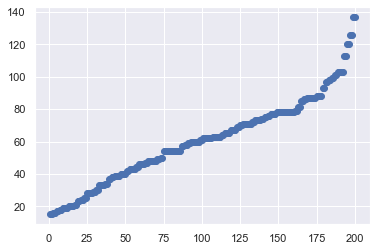

In [13]:
#Creating scatter plot for the samples from each cluster
for cluster in clusters:
    # get row indexes for samples with this cluster
    row_ix = where(yhat == cluster)
    # create scatter of these samples
    plt.scatter(data_x[row_ix, 0], data_x[row_ix, 1])
# show the plot
plt.show()